## Based on Data Professor's open research 

Data soruce : Chembel' beta-lactase 
https://github.com/dataprofessor/beta-lactamase 



**Beta - lactemase** 

[beta-lactamase](https://pubmed.ncbi.nlm.nih.gov/32491524/) inhibitors are drugs that are co-administered with beta-lactam antimicrobials to prevent antimicrobial resistance by inhibiting serine beta-lactamases, which are enzymes that inactivate the beta-lactam ring, which is a common chemical structure to all beta-lactam antimicrobials. 

In [2]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#import ziped csv files and combined into single dataframe 
zf = zipfile.ZipFile("beta_lactamase_CHEMBL29.zip","r")
df = pd.concat( 
    (pd.read_csv(zf.open(f)) for f in zf.namelist())
)

In [4]:
df

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,=,10.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
1,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,NaN,NaN,NaN,Kcat/Km,NaN,Gil1,assay format
2,CHEMBL617,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)Cc3ccc...,=,598.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
3,CHEMBL702,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...,=,3400.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
4,CHEMBL1449,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...,=,10000.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
...,...,...,...,...,...,...,...,...,...
13,CHEMBL561555,COC(=O)CC(N)(CC(=O)OC)C(=O)OCc1ccccc1,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
14,CHEMBL561821,NC(CC(=O)OCc1ccccc1)(CC(=O)OCc1ccccc1)C(=O)OCc...,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
15,CHEMBL561896,COC(=O)CC(CC(=O)OC)(NC(=O)Cc1ccccc1)C(=O)OC,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
16,CHEMBL563044,COC(=O)C(CC(=O)OCc1ccccc1)(CC(=O)OCc1ccccc1)NC...,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format


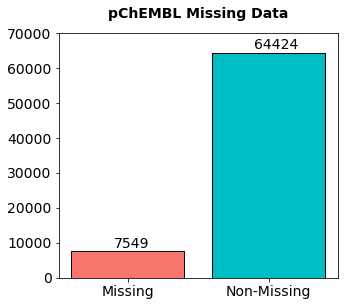

In [5]:
# Bar plot of Missing vs Non-Missing Data

# Data
missing = df.pchembl_value.isnull().sum()
nonmissing = df.pchembl_value.notnull().sum()

x = ['Missing', 'Non-Missing']
y = [missing, nonmissing]

# Setup plot
fig, ax = plt.subplots()

# Make bar plot
p = ax.bar(x, y, color = ['#F8766D', '#00BFC4'], ec = 'black')

ax.set_title('pChEMBL Missing Data', fontsize=14, fontweight='bold', pad=15)
#ax.set_xticklabels(x, fontweight='bold')

ax.set_ylim(0,70000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Label above bar
for index, data in enumerate(y):
    plt.text(x=index-0.1 , y =data+1000 , s=f"{data}" , fontdict=dict(fontsize=14))

fig.set_size_inches(5,4.5)
plt.show()

In [6]:
# removing missing values in pChEMBL value 
df2 = df[df.pchembl_value.notnull()]
df2.head()

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
47,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,9.0,nM,IC50,8.05,Gil1,assay format
48,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,40.0,nM,IC50,7.40,Gil1,assay format
7,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,70.0,nM,IC50,7.16,Beta-lactamase SCO-1,single protein format
8,CHEMBL403,CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O,=,6200.0,nM,IC50,5.21,Beta-lactamase SCO-1,single protein format
9,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,10.0,nM,IC50,8.00,Beta-lactamase SCO-1,single protein format


In [7]:
df2.groupby('molecule_chembl_id').std()

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL1018,NaN,NaN
CHEMBL1024,NaN,NaN
CHEMBL1028,NaN,NaN
CHEMBL1036,NaN,NaN
CHEMBL104,10606.601718,0.169706
...,...,...
CHEMBL97643,NaN,NaN
CHEMBL977,NaN,NaN
CHEMBL98406,NaN,NaN


In [8]:
# include molecules which have less than 2 standard deviation if it has more than 1 value. 
df3 = df2.groupby(['molecule_chembl_id', 'canonical_smiles']).std()
df3=df3[(df3.pchembl_value < 2) | (df3.pchembl_value =='NaN' )]
df3 = df3.reset_index()

In [9]:
df4 = df2.groupby(['molecule_chembl_id', 'canonical_smiles']).mean()
df4=df4.reset_index()
df4['activity'] = df4['pchembl_value'].apply(lambda x: "inactive" if (x <=5) else ("Active" if(x>=6) else "Intermediate") )

In [10]:
y = []
for x in df4['molecule_chembl_id'].to_list():
    y.append(x in df3.molecule_chembl_id.to_list())
df4 = df4[y]

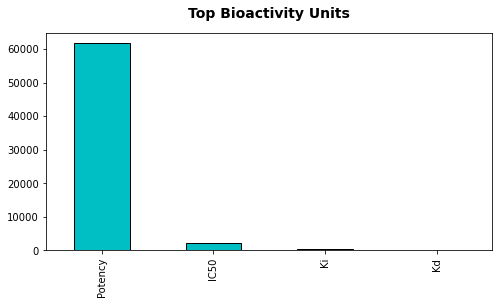

In [11]:
df2.standard_type.value_counts()[:10].plot.bar(figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Top Bioactivity Units', fontsize=14, fontweight='black', pad=15)
plt.show()

In [12]:
from rdkit import Chem 
from rdkit.Chem import Draw
import networkx as nx 

In [13]:
#Fucntion to convert rdkit object (Mol) to netwrokx object 
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), 
                atomic_num = atom.GetAtomicNum(), 
                is_aromatic = atom.GetIsAromatic(), 
                atom_symbol = atom.GetSymbol())
    
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), 
        bond.GetEndAtomIdx(),
        bond_type = bond.GetBondType())

    return G

In [14]:
#Salt Remover
from rdkit.Chem import SaltRemover 
remover = SaltRemover.SaltRemover()
df4['mol'] = df4['canonical_smiles'].apply(lambda x: Chem.MolFromSmiles(x))
df4['mol_noSalt'] = df4['mol'].apply(lambda x: remover.StripMol(x))
df4 = df4.reset_index().drop(['index'], axis = 1)

In [15]:
# test network visulization 
mol_nx = mol_to_nx(df4.mol_noSalt[1])
mol_atom = nx.get_node_attributes(mol_nx,'atom_symbol')

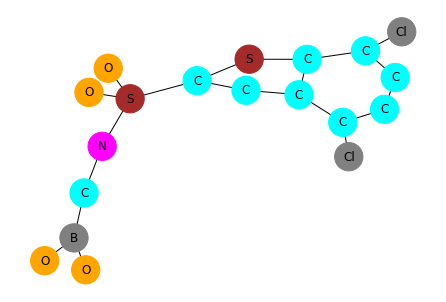

In [16]:
color_map = {
    'C':'cyan', 
    'O' : 'orange', 
    'N' : 'magenta',
    'S' : 'brown'
}

mol_colors = [] 

for idx in mol_nx.nodes():
    if(mol_nx.nodes[idx]['atom_symbol'] in color_map):
        mol_colors.append(color_map[mol_nx.nodes[idx]['atom_symbol']])
    else:
        mol_colors.append('gray')


nx.draw(mol_nx, labels = mol_atom, with_labels = True, node_color = mol_colors, node_size = 800)
plt.show()

## Molecular Fingerprint from SMILES String 
- calcualte molecular similarity, [details on fingerprint](https://rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf)

### RDKit Fingerprint 
Substructure fingerprint, where atom types are set by atomic number and aromaticity  and bond types by atom types and bond types. 

### morgan fingerprint 
Similarity fingerprint, where atom types are set by connectivity (element,.....), chemical features by donor, acceptor, aromatic, halogen, basic, acidic. takes in account the neighborhood of each atom


In [17]:
from rdkit.Chem import RDKFingerprint
from rdkit.Chem import rdMolDescriptors

In [18]:
fingerprint_rdk = df4['mol_noSalt'].apply(lambda x: RDKFingerprint(x))
fingerprint_morgan = df4['mol_noSalt'].apply(lambda x: rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius =2))

In [19]:
print("rdk np shape", np.array(fingerprint_rdk).shape)
print("morgan np shape", np.array(fingerprint_morgan).shape)

rdk np shape (796,)
morgan np shape (796,)


## Graph2Vec 

Package karateclub have implemented many of the Graph2Vec https://github.com/benedekrozemberczki/karateclub . 
Graph-level embedding 


In [20]:
df4['graph_noSalt'] = df4['mol_noSalt'].apply(lambda x:mol_to_nx(x))

In [21]:
from karateclub import Graph2Vec

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [22]:
model =Graph2Vec()
model.fit(df4['graph_noSalt'])
df4_graph2vec = model.get_embedding()

In [23]:
df4_graph2vec = pd.DataFrame(df4_graph2vec)

In [24]:
df4.reset_index().drop(['index'], axis = 1)

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,activity,mol,mol_noSalt,graph_noSalt
0,CHEMBL104,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,27500.000000,4.580000,inactive,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,CHEMBL1089781,O=S(=O)(NCB(O)O)c1cc2c(Cl)ccc(Cl)c2s1,1997.500000,5.905000,Intermediate,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,CHEMBL1091,CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...,84217.950000,4.100000,inactive,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,CHEMBL109227,OB(O)c1ccc(-c2ccc(B(O)O)cc2)cc1,200.000000,6.700000,Active,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,CHEMBL1126,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,5400.000000,5.290000,Intermediate,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
...,...,...,...,...,...,...,...,...
791,CHEMBL87686,O=C(O)[C@H](S)Cc1ccc2oc3ccccc3c2c1,4961.505000,6.320000,Active,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
792,CHEMBL87719,CC1(C)[C@H](C(=O)O)N2C(=O)[C@]3(C[C@@H]3OC3CCC...,270.000000,6.905000,Active,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
793,CHEMBL891,Cc1onc(-c2ccccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H...,4343.333333,6.956667,Active,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
794,CHEMBL9306,O=C([O-])[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21.[Li+],234.000000,6.785000,Active,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)"


In [25]:
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,pchembl_value,activity,mol,mol_noSalt,graph_noSalt
0,CHEMBL104,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,27500.00,4.580,inactive,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,CHEMBL1089781,O=S(=O)(NCB(O)O)c1cc2c(Cl)ccc(Cl)c2s1,1997.50,5.905,Intermediate,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,CHEMBL1091,CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...,84217.95,4.100,inactive,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,CHEMBL109227,OB(O)c1ccc(-c2ccc(B(O)O)cc2)cc1,200.00,6.700,Active,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,CHEMBL1126,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,5400.00,5.290,Intermediate,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,<rdkit.Chem.rdchem.Mol object at 0x0000022FFA0...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [26]:
df_final = pd.concat([df4_graph2vec, df4.reset_index()['activity']], axis=1)

In [27]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,activity
0,0.068106,-0.061417,-0.128575,0.150424,0.020372,-0.085283,0.011655,-0.077174,0.024998,-0.073622,...,-0.049022,0.086620,-0.044104,0.124869,-0.052695,-0.055495,0.031142,-0.005510,-0.051081,inactive
1,0.076360,-0.074928,-0.164772,0.186630,0.037874,-0.102147,0.017410,-0.097046,0.028732,-0.079442,...,-0.050959,0.103853,-0.049895,0.149925,-0.068506,-0.070336,0.028905,-0.006997,-0.067342,Intermediate
2,0.087053,-0.090881,-0.183176,0.210557,0.042721,-0.113623,0.021623,-0.110969,0.033636,-0.085670,...,-0.054618,0.101106,-0.066367,0.155013,-0.080910,-0.063161,0.029965,-0.019482,-0.064159,inactive
3,0.045920,-0.051110,-0.092490,0.098737,0.013175,-0.053970,0.012360,-0.061444,0.012487,-0.043885,...,-0.033087,0.054408,-0.030058,0.074441,-0.046467,-0.034865,0.020420,-0.007611,-0.037745,Active
4,0.068080,-0.075630,-0.143839,0.157615,0.030108,-0.084227,0.017596,-0.088191,0.034572,-0.073293,...,-0.047023,0.079338,-0.051661,0.120568,-0.053527,-0.047528,0.027090,-0.014032,-0.061087,Intermediate


In [28]:
df_final.shape

(796, 129)

## Machine Learning Random Forest
Comparision between : 
Fingerprints with RF, 
Graph2Vec embeding of molecules with RF, and 
GNNs  

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve

In [37]:
# data Spliting 
X_g2v = df4_graph2vec
y = df4['activity']
X_train_g2v, X_test_g2v, y_train, y_test = train_test_split(X_g2v, y, test_size = 0.25, random_state = 0)
classifier_g2v = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier_g2v.fit(X_train_g2v, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [38]:
# Predicting the Test set results
y_pred_g2v = classifier_g2v.predict(X_test_g2v)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_g2v)

In [39]:
y_score_g2v = classifier_g2v.predict_proba(X_test_g2v)

In [40]:
from sklearn.preprocessing import label_binarize 
y_test_bin = label_binarize(y_test, classes = ['Active', 'Intermediate', 'Inactive'])

In [41]:
n_classes = y_test_bin.shape[1]

AUC for Class 1: 0.5906175255490325
AUC for Class 2: 0.5798368298368299
AUC for Class 3: nan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


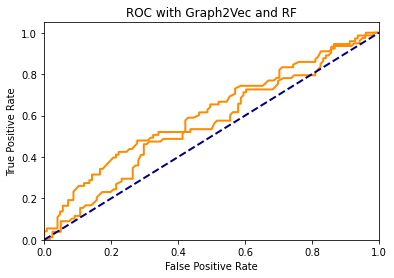

In [42]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_g2v[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC with Graph2Vec and RF')
plt.show()

### Random Forest with Fingerprints

In [45]:
X_train_fp, X_test_fp, y_train_fp, y_test_fp = train_test_split(fingerprint_rdk, y, test_size = 0.25, random_state = 0)
classifier_fp = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier_fp.fit(X_train_g2v, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [46]:
# Predicting the Test set results
y_pred_fp = classifier_fp.predict(X_test_fp)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_fp, y_pred_fp)

y_score_fp = classifier_fp.predict_proba(X_test_fp)
y_test_bin_fp = label_binarize(y_test_fp, classes = ['Active', 'Intermediate', 'Inactive'])
n_classes = y_test_bin_fp.shape[1]

ValueError: setting an array element with a sequence.

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin_fp[:, i], y_score_fp[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC with fingerprint and RF')
plt.show()